# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Zak Davlin

### Article: https://draftsim.com/mtg-30th-anniversary-edition/https://draftsim.com/mtg-30th-anniversary-edition/
Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [4]:
import requests
import pickle
r=requests.get('https://draftsim.com/mtg-30th-anniversary-edition/')
with open('MTGBlog.pkl','wb') as f:
    pickle.dump(r.text,f)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [130]:
import pickle
import spacy
from bs4 import BeautifulSoup
from spacytextblob.spacytextblob import SpacyTextBlob

with open('MTGBlog.pkl', 'rb') as f:
    htmldoc = pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')

text=soup.find("article")    
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())
print("Polarity Score of the Aritcle:  ", doc._.blob.polarity)
i=0
for sentence in list(doc.sents) :
    i+=1
print("Number of Sentences in Article:  ",i)



Polarity Score of the Aritcle:   0.13234031132581855
Number of Sentences in Article:   141


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [6]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('MTGblog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())

def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

important_tokens = [token for token in doc if important_words(token)]

lowercase_important_tokens=[token.text.lower() for token in important_tokens]
word_freq= Counter(map(str,lowercase_important_tokens))
print (word_freq.most_common(5))

[('anniversary', 44), ('30th', 43), ('edition', 37), ('cards', 25), ('set', 22)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [8]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())

def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]
lemma_freq=Counter(important_lemmas)
print(lemma_freq.most_common(5))

[('anniversary', 44), ('30th', 43), ('edition', 37), ('card', 31), ('set', 23)]


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[Text(0.5, 0, 'TokenScores'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Token Score histogram')]

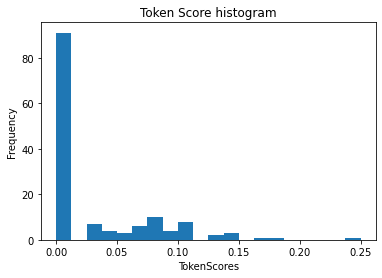

In [94]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())
def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
important_tokens = [token for token in doc if important_words(token)]
token_freq=Counter(map(str,important_tokens))
important_tokens = set()
for token, freq in token_freq.most_common(5):
    important_tokens.add(token)

important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

lemma_freq=Counter(important_lemmas)

important_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    important_lemmas.add(lemma)

def score_sentence_by_token(sentence1, interesting_token):
    count = 0
    count2 = 1
    for token in sentence1:
        if token.text.lower() in interesting_token:
            count +=1
    for token in sentence1:
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2

List_of_token_scores=[]
sentence_numbers=[]
for i in doc.sents:
    List_of_token_scores.append(score_sentence_by_token(i,important_tokens))

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots()
ax.hist(List_of_token_scores,bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='TokenScores',ylabel='Frequency',title='Token Score histogram')


Around .01 seems to be the most common Sentence token score.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[Text(0.5, 0, 'LemmaScores'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Lemma Score histogram')]

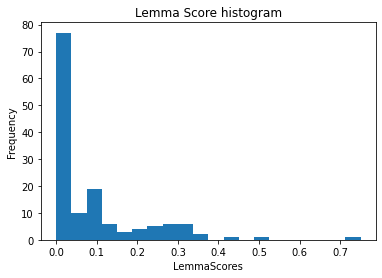

In [95]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())
def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
important_tokens = [token for token in doc if important_words(token)]
token_freq=Counter(map(str,important_tokens))
important_tokens = set()
for token, freq in token_freq.most_common(5):
    important_tokens.add(token)

important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

lemma_freq=Counter(important_lemmas)

important_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    important_lemmas.add(lemma)

def score_sentence_by_token(sentence1, interesting_token):
    count = 0
    count2 = 1
    for token in sentence1:
        if token.text.lower() in interesting_token:
            count +=1
    for token in sentence1:
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2


def score_sentence_by_lemma(sentence1, interesting_lemmas):
    count=0
    count2=1
    for token in sentence1:
        if token.lemma_.lower()in interesting_lemmas:
            count+=1
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2

List_of_lemma_scores=[]
sentence_numbers=[]
for i in doc.sents:
    List_of_lemma_scores.append(score_sentence_by_lemma(i,important_lemmas))
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots()
ax.hist(List_of_lemma_scores,bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='LemmaScores',ylabel='Frequency',title='Lemma Score histogram')

It still seems to be around .02 is the most common score.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): .11
* Cutoff Score (lemmas): .1

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [114]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
#open MTGBlog pickle file and create readable doc for spacy
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())


def summarizer(doc):
    #define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    important_tokens = [token for token in doc if important_words(token)]
    token_freq=Counter(map(str,important_tokens))
    important_tokens = set()
    for token, freq in token_freq.most_common(5):
        important_tokens.add(token)
    
    #Score Sentence Function by token
    def score_sentence_by_token(sentence1, interesting_token):
        count = 0
        count2 = 1
        for token in sentence1:
            if token.text.lower() in interesting_token:
                count +=1
        for token in sentence1:
            if not(token.is_space or token.is_punct):
                count2 += 1
        return count/count2
    #create empty list for sentences
    important_sent=[]
    #break article into sentences
    sentences = list(doc.sents)
    for sent in sentences:
        if score_sentence_by_token(sent,important_tokens) >= .11:
            important_sent.append(sent.text.strip())
    sent_str = str(sentence)
    print('  '.join(important_sent))
summarizer(doc)
    
    

But is 30th Anniversary Edition really that bad?  Cards from Beta Are Missing?What Are the Odds of Getting Power 9 in 30th Anniversary  30th Anniversary Edition  What’s the Price of 30th Anniversary Edition?  Is 30th Anniversary Edition Tournament Legal?  Nope, you can’t play the 30th Anniversary Edition cards in any sanctioned format.  the 30th Anniversary Edition cards into Commander pods with permission.  What Cards from Beta Are Missing?  Is 30th Anniversary Edition Draftable?  Yes, 30th Anniversary Edition is draftable in theory!  Enable Bootstrap Tooltips
                        $('[data-toggle="tooltip"]').tooltip();

                    });
                
MTG MTG 30th anniversary MTG 30th anniversary edition MTG 30th anniversary edition recommendation MTG 30th anniversary edition review MTG 30th anniversary promos MTG cards MTG collection MTG product review MTG products

  

 Bryan Hohns (Veveil)


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [113]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
#open MTGBlog pickle file and create readable doc for spacy
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())


def summarizer(doc):
    #define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    important_tokens = [token for token in doc if important_words(token)]
    token_freq=Counter(map(str,important_tokens))
    important_tokens = set()
    for token, freq in token_freq.most_common(5):
        important_tokens.add(token)
    
    #Score Sentence Function by token
    def score_sentence_by_token(sentence1, interesting_token):
        count = 0
        count2 = 1
        for token in sentence1:
            if token.text.lower() in interesting_token:
                count +=1
        for token in sentence1:
            if not(token.is_space or token.is_punct):
                count2 += 1
        return count/count2
    #create empty list for sentences
    important_sent=[]
    #break article into sentences
    sentences = list(doc.sents)
    for sent in sentences:
        if score_sentence_by_token(sent,important_tokens) >= .11:
            important_sent.append(sent.text.strip())
    a='  '.join(important_sent)
    return a
Newdoc=nlp(summarizer(doc))
print("Polarity Score of the Aritcle:  ", Newdoc._.blob.polarity)
i=0
for sentence in list(Newdoc.sents) :
    i+=1
print("Number of Sentences in Article:  ",i)  

Polarity Score of the Aritcle:   -0.13749999999999996
Number of Sentences in Article:   9


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [123]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
#open MTGBlog pickle file and create readable doc for spacy
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())


def summarizer_lemma(doc):
    #define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

    lemma_freq=Counter(important_lemmas)

    important_lemmas = set()
    for lemma, freq in lemma_freq.most_common(5):
        important_lemmas.add(lemma)
    
    #Score Sentence Function by token
    def score_sentence_by_lemma(sentence1, interesting_lemmas):
        count=0
        count2=1
        for token in sentence1:
            if token.lemma_.lower()in interesting_lemmas:
                count+=1
            if not(token.is_space or token.is_punct):
                count2 += 1
        return count/count2
    #create empty list for sentences
    important_sent=[]
    #break article into sentences
    sentences = list(doc.sents)
    for sent in sentences:
        if score_sentence_by_token(sent,important_lemmas) >= .28:
            important_sent.append(sent.text.strip())
    print('  '.join(important_sent))

summarizer_lemma(doc)

Are you excited for Magic’s 30th Anniversary Edition?  But is 30th Anniversary Edition really that bad?  30th Anniversary Edition Draftable?How Can You Practice Drafting the Set (for Free)?Wrap Up  30th Anniversary Edition  Each box of 30th Anniversary Edition comes with four 15-card boosters.  What’s the Price of 30th Anniversary Edition?  Four packs of 30th Anniversary Edition cost $999.  Is 30th Anniversary Edition Tournament Legal?  Is 30th Anniversary Edition Draftable?  Yes, 30th Anniversary Edition is draftable in theory!  Enable Bootstrap Tooltips
                        $('[data-toggle="tooltip"]').tooltip();

                    });
                
MTG MTG 30th anniversary MTG 30th anniversary edition MTG 30th anniversary edition recommendation MTG 30th anniversary edition review MTG 30th anniversary promos MTG cards MTG collection MTG product review MTG products

  

 Bryan Hohns (Veveil)


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [122]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
#open MTGBlog pickle file and create readable doc for spacy
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())


def summarizer_lemma(doc):
    #define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

    lemma_freq=Counter(important_lemmas)

    important_lemmas = set()
    for lemma, freq in lemma_freq.most_common(5):
        important_lemmas.add(lemma)
    
    #Score Sentence Function by token
    def score_sentence_by_lemma(sentence1, interesting_lemmas):
        count=0
        count2=1
        for token in sentence1:
            if token.lemma_.lower()in interesting_lemmas:
                count+=1
            if not(token.is_space or token.is_punct):
                count2 += 1
        return count/count2
    #create empty list for sentences
    important_sent=[]
    #break article into sentences
    sentences = list(doc.sents)
    for sent in sentences:
        if score_sentence_by_token(sent,important_lemmas) >= .28:
            important_sent.append(sent.text.strip())
    a='  '.join(important_sent)
    return a
Newdoc=nlp(summarizer_lemma(doc))
print("Polarity Score of the Aritcle:  ", Newdoc._.blob.polarity)
i=0
for sentence in list(Newdoc.sents) :
    i+=1
print("Number of Sentences in Article:  ",i) 

Polarity Score of the Aritcle:   0.12500000000000003
Number of Sentences in Article:   9


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores are very different. The token score shows that the article is negative while the lemma score shows it is positive. I believe this is due to the fact that the lemma score picked up more title's in its analysis. most of the titles in this article were questions with very little sentiment. On the other hand the token sentences brought up many of the issues with Magic's most recent release.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?
I think that the token summary is more representitive in this case. The article is descirbing how poorly magic handled its 30th anniversary edition set. Once again I think the Lemmas pulled more of the headings that didn't give much information while the tokens pulled more of the "meat" of the article.